# Part II: Forecasting S&P500 with a Supervised Baseline Model:
## Support Vector Machine

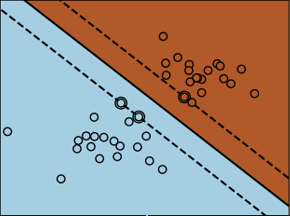

In [11]:
from IPython.display import Image
Image(filename = "svm.png", width=300)
# Image obtained from https://scikit-learn.org/

### *Normalized Mean Square Error*:
#### Measure of the deviation between the actual and predicted values. The smaller the value of the NMSE, the closer are the predicted values to the actual values.	

### *Directional Accuracy*:
#### Provides an indication of the correctness of predicted direction of stock price.

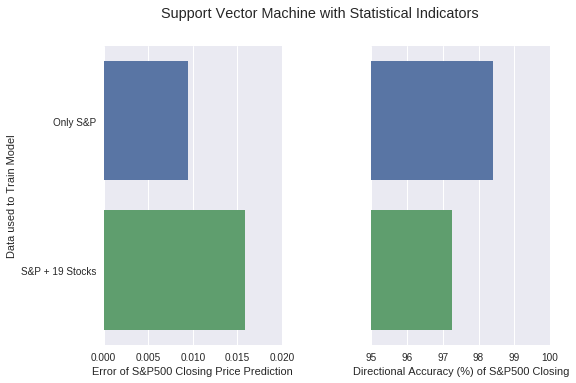

In [13]:
Image(filename = "svm_performance.png", width=700)

#### Splitting the dataset into the training set and test set

In [0]:
from sklearn.cross_validation import train_test_split
DATA_training, DATA_test = train_test_split(DATA_new, test_size = 0.25, random_state = 0)

#### Splitting the training dataset into the validation set and SVM training set

In [0]:
DATA_SVM, DATA_validation = train_test_split(DATA_training, test_size = 0.04, random_state = 0)

### S&P Prediction with SVM Model using:
#### S&P Price and S&P Technical Indicators Data


In [0]:
data_SVM = DATA_SVM[:,range(0,21)]
data_test = DATA_test[:,range(0,21)]

#### Regression

In [0]:
from sklearn.svm import SVR
y = data_SVM[:,0]
x = np.delete(data_SVM,0,axis=1)
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(x, y)

#### Prediction

In [0]:
yt = data_test[:,0]
xt = np.delete(data_test,0,axis=1)
yp = clf.predict(xt)

#### Performance Measurement

In [0]:
NMSE = sum((yt-yp)**2)/sum((yt-np.mean(yt))**2)
yt_DA = np.delete(yt,0) - np.delete(yt,-1)
yp_DA = np.delete(yp,0) - np.delete(yt,-1)
y_DA = yt_DA * yp_DA
DA = sum(y_DA>0)/len(y_DA)
print('SVM+1: '+'NMSE: '+str(NMSE)+' DA: '+str(DA*100)+'%')

### S&P Prediction with SVM Model using:

#### S&P Price Data + Technical Indicators of S&P and 19 other Highly Correlated Stocks Data


#### Regression

In [0]:
from sklearn.svm import SVR
Y = DATA_SVM[:,0]
X = np.delete(DATA_SVM,0,axis=1)
CLF = SVR(C=1.0, epsilon=0.2)
CLF.fit(X, Y)

#### Prediction

In [0]:
Yt = DATA_test[:,0]
Xt = np.delete(DATA_test,0,axis=1)
Yp = CLF.predict(Xt)

#### Performance Measurement

In [0]:
NMSE = sum((Yt-Yp)**2)/sum((Yt-np.mean(Yt))**2)
Yt_DA = np.delete(Yt,0) - np.delete(Yt,-1)
Yp_DA = np.delete(Yp,0) - np.delete(Yt,-1)
Y_DA = Yt_DA * Yp_DA
DA = sum(Y_DA>0)/len(Y_DA)
print('SVM+20: '+'NMSE: '+str(NMSE)+' DA: '+str(DA*100)+'%')

In [0]:
# Error DF
import pandas as pd
errorDf=pd.DataFrame([['Only S&P',0.009471857616461611,98.4081041968162],['S&P + 19 Stocks',0.015876607636085626,97.25036179450073]],columns=['Data used to Train Model','Error of S&P500 Closing Price Prediction','Directional Accuracy (%) of S&P500 Closing Price'])

In [0]:
# Error DF
errorDf=pd.DataFrame([['Only S&P',0.009471857616461611,98.4081041968162],['S&P + 19 Stocks',0.015876607636085626,97.25036179450073]],columns=['Data used to Train Model','Error of S&P500 Closing Price Prediction','Directional Accuracy (%) of S&P500 Closing Price'])

In [0]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Support Vector Machine with Statistical Indicators')
sns.factorplot(y="Data used to Train Model", x="Error of S&P500 Closing Price Prediction", data=errorDf,kind='bar', ax=ax1)
ax1.set_xlim(0.00,.020)
ax1.set_xlabel("Error of S&P500 Closing Price Prediction")

sns.factorplot(y="Data used to Train Model", x="Directional Accuracy (%) of S&P500 Closing Price", data=errorDf,kind='bar',ax=ax2)
ax2.set_xlim(95,100)
ax2.set_xlabel("Directional Accuracy (%) of S&P500 Closing Price")
plt.show()

#### The idea behind the model used in this presentation is obtained from the paper titled 
#### "Feature Extraction Using Restricted Boltzmann Machine for Stock Price Prediction"
#### written by Xianggao Cai, Su Hu, and Xiaola Lin from Sun Yat-sen University in Guangzhou, China.